# Laboratorium 3

### Konfiguracja

In [1]:
from definitions import *
from defs import *
from visual import *

<IPython.core.display.Javascript object>


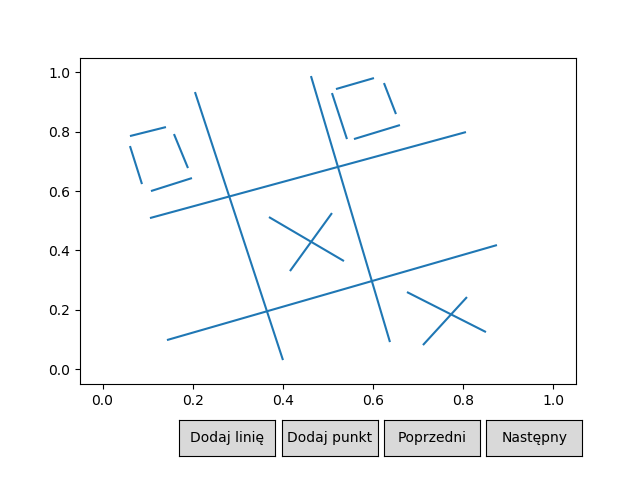

In [2]:
#Dodaj tu punkty i/lub odcinki!
%matplotlib notebook
plot1 = Plot()
plot1.draw()

In [3]:
lines = get_segments_from_plot(plot1)

### Rozwiązanie

In [4]:
def contains_intersection(data_set):
    events = prepare_events(data_set)
    state = SortedSet() # (point, event, [skey])

    def get_neighbours(segment):
        index = state.index(segment)
        return (state[index - 1].segment if index > 0 else None, #above
            state[index + 1].segment if index < len(state) - 1 else None) #bellow


    def check_if_intersection_exists(segment, neighbour, orientation):
        if neighbour and segment:
            point = get_intersection_point(segment, neighbour, orientation)
            return True if point else False

    def check_intersections(state, skey):
        above, below = get_neighbours(skey)
        return check_if_intersection_exists(skey.segment, above, BELOW) or \
               check_if_intersection_exists(skey.segment, below, ABOVE)

    for _, event, [skey] in iter_events(events):
        if event == START:
            state.add(skey)
            if check_intersections(state, skey):
                return True
        elif event == END:
            above, below = get_neighbours(skey)
            state.remove(skey)
            if check_if_intersection_exists(above, below, ABOVE):
                return True
    return False

<IPython.core.display.Javascript object>


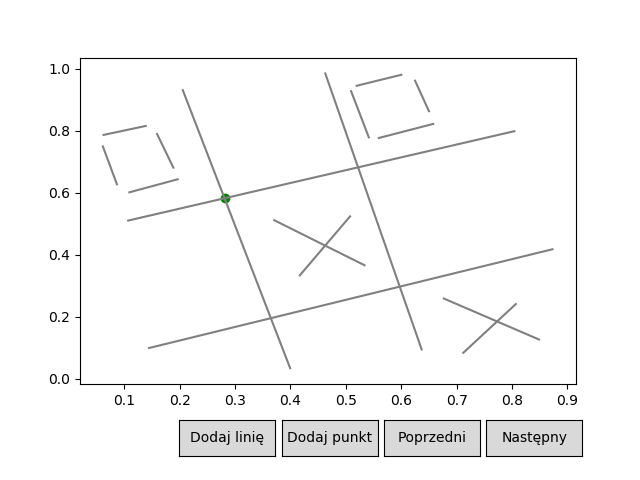

In [5]:
plot = Plot(list(simple_visual(lines)))
plot.draw()

In [7]:
contains_intersection(lines)

True

In [8]:
def sweep(data_set):
    events = prepare_events(data_set)
    state = SortedSet() # (point, event, [skey])
    intersections, points = [], []

    def get_neighbours(segment):
        index = state.index(segment)
        return (state[index - 1].segment if index > 0 else None, #above
            state[index + 1].segment if index < len(state) - 1 else None) #bellow

    def add_intersection_if_exists(segment, neighbour, orientation):
        if neighbour and segment:
            point = get_intersection_point(segment, neighbour, orientation)
            if point:
                inter = tuple(sorted([segment, neighbour]))
                if inter not in intersections:
                    intersections.append(inter)
                    points.append(point)
                    events.put((point, INTERSECT, [Key(segment), Key(neighbour)]))


    def add_intersections(state, skey):
        above, below = get_neighbours(skey)
        add_intersection_if_exists(skey.segment, above, BELOW)
        add_intersection_if_exists(skey.segment, below, ABOVE)

    for point, event, segments in iter_events(events):
        if event == START:
            [skey] = segments
            state.add(skey)
            add_intersections(state, skey)
        elif event == END:
            [skey] = segments
            above, below = get_neighbours(skey)
            state.remove(skey)
            add_intersection_if_exists(above, below, ABOVE)
        else:
            above, below = segments
            
            state.remove(above)
            state.remove(below)
            above.op = below.op = point
            
            state.add(above)
            state.add(below)
            add_intersections(state, above)
            add_intersections(state, below)


    return list(zip(points, intersections))

## Legenda
* niebieskie odcinki - odcinki w stanie miotły
* czerwony punkt - aktualny event
* zielone punkty - punkty przecięcia
* zielony odcinek - odcinek poniżej
* czerwony odcinek - odcinek powyżej

<IPython.core.display.Javascript object>


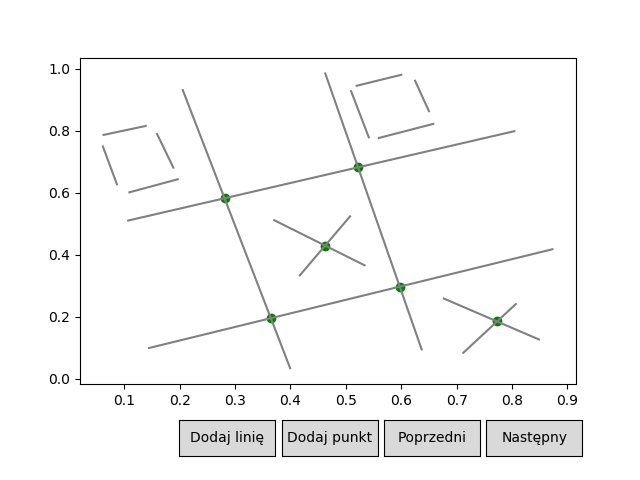

In [9]:
plot = Plot(list(algo_visual(lines)))
plot.draw()

<IPython.core.display.Javascript object>


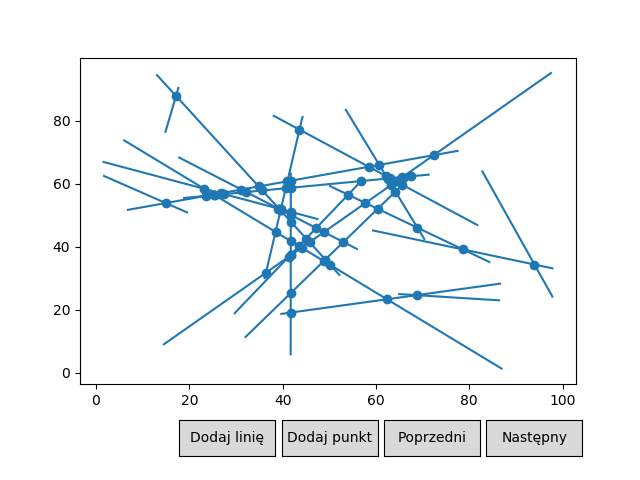

In [10]:
lines = generate_n_segments(20, (0, 0), (100,100))
plot = Plot([
    Scene([ PointsCollection([point for point, _ in sweep(lines)])
    ], [ LinesCollection(lines) ])
])
plot.draw()

In [11]:
intersections = sweep(lines)
print(len(intersections))
# for (point, (s1, s2)) in intersections: # zakomentowane z powodów estetycznych
#     print (s1, 'intersects with', s2, 'at', point)

65


In [ ]:
#save_to(lines); lines = load()